In [12]:
# So we can run from within the censusdis project and find the packages we need.
import os
import sys

sys.path.append(
    os.path.join(os.path.abspath(os.path.join(os.path.curdir, os.path.pardir)))
)
import os

import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from typing import Iterable, Optional

from censusdis.states import STATE_NJ, STATE_AK, STATE_HI, ALL_STATES_AND_DC
from censusdis.maps import ShapeReader, plot_us_boundary
import censusdis.maps as cem
import censusdis.data as ced
from censusdis.states import NY

In [2]:
YEAR = 2020

In [3]:
gdf_tract = ced.download(
    "acs/acs5",
    YEAR,
    "B19013_001E",
    state=NY,
    county=["061", "081", "005", "047"],
    tract="*",
    with_geometry=True,
)

/Users/vengroff/src/censusdis/censusdis/data.py:492: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf_shapefile = gdf_shapefile.append(


<Axes: >

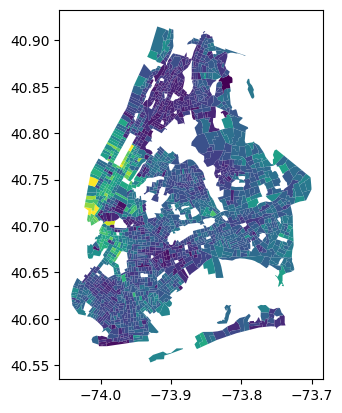

In [4]:
gdf_tract.plot(column="B19013_001E")

In [5]:
NYC_without_water = ced.clip_water(gdf_tract, 2020)

<Axes: >

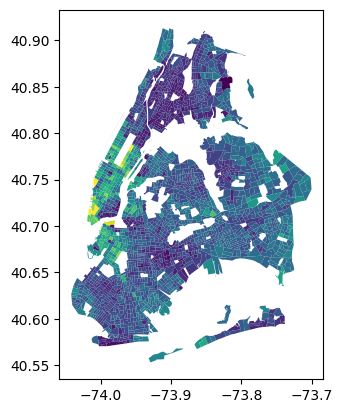

In [6]:
NYC_without_water.plot(column="B19013_001E")

<Axes: >

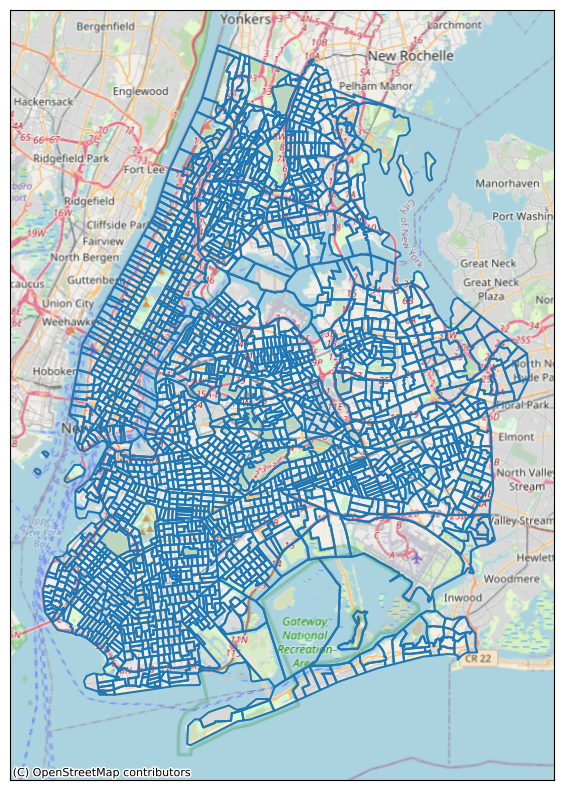

In [13]:
cem.plot_map(gdf_tract.boundary, with_background=True, figsize=(10, 10))

<Axes: >

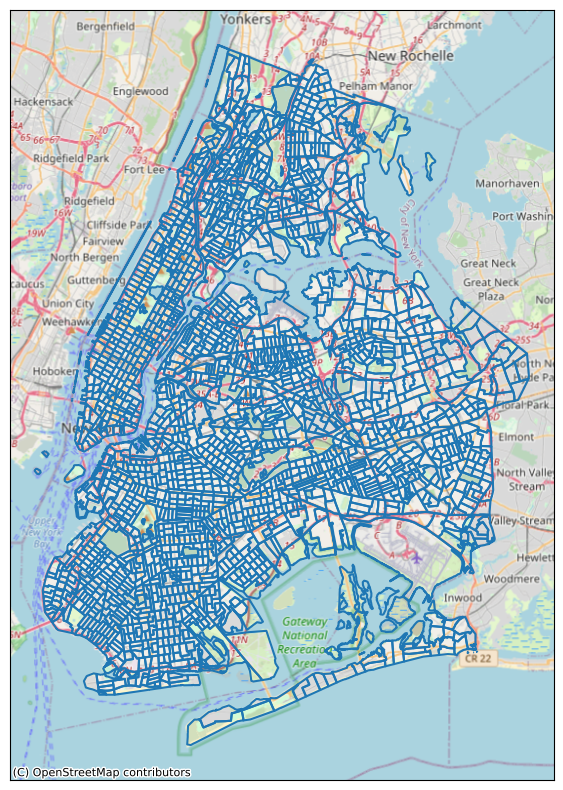

In [14]:
cem.plot_map(NYC_without_water.boundary, with_background=True, figsize=(10, 10))